In [ ]:
##
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] =  False

In [ ]:
##
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df.head(2)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89


In [ ]:
## make timestamp as dstetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.head(2)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
##
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
##
fig = px.line(df, x = 'timeStamp', y = 'demand', title = 'NYC Energy Demand')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '3y', step = "year", stepmode = 'backward'),
             dict(count = 3, label = '5y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

In [ ]:
## set index
ny_df = df.set_index('timeStamp')
ny_df.head(2)

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89


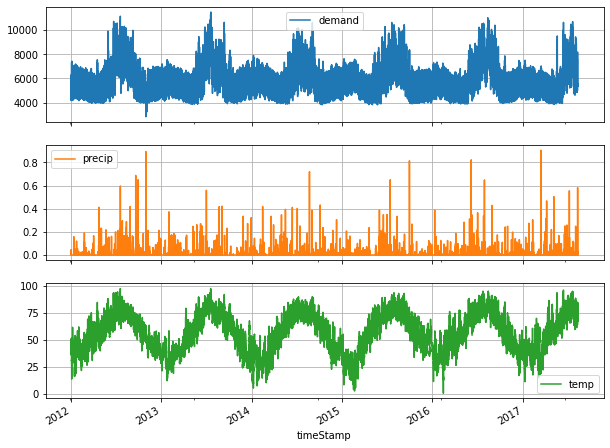

In [ ]:
## plot
ny_df.plot(subplots=True, figsize=(10,8), grid = True);

In [ ]:
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])
print("\nFeatures: \n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().any())
print("\nUnique values : \n", df.nunique())

Rows    :  49205
Columns :  4

Features: 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing Values:
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values : 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [ ]:
## check demand missing values
df.query('demand != demand')

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [ ]:
## Imputation using forward fill
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

In [ ]:
## check
print("\nMissing Values: ", df.isnull().any())


Missing Values:  timeStamp    False
demand       False
precip        True
temp         False
dtype: bool


In [ ]:
## set index
ny_df = df.set_index('timeStamp')
ny_df.head(2)

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89


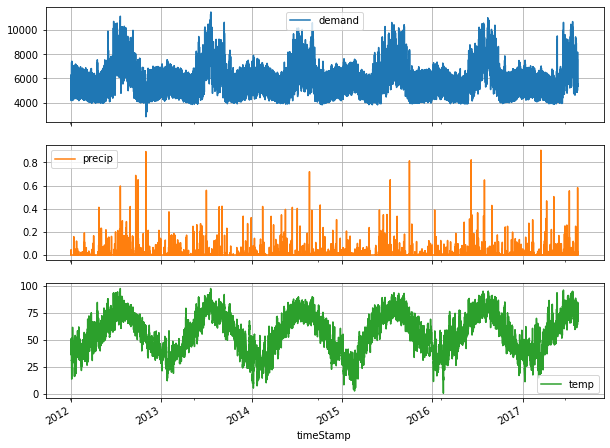

In [ ]:
## plot
ny_df.plot(subplots=True, figsize=(10,8), grid = True);

                 demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]


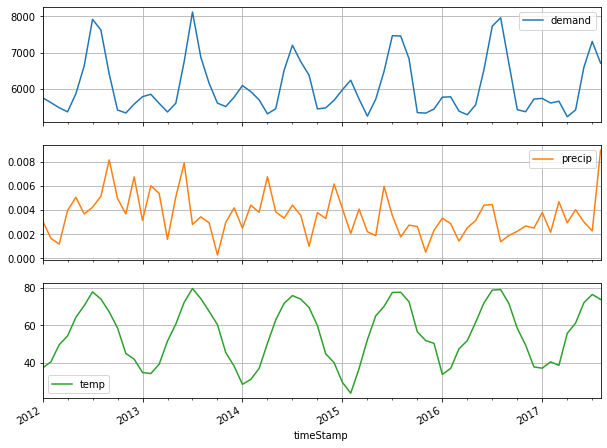

In [ ]:
## Resample on month level
print(ny_df.resample('M').mean())

## plot
ny_df.resample('M').mean().plot(subplots = True, grid=True, figsize=(10,8));

In [ ]:
## monthly data 
ny_df_monthly = ny_df.resample('M').mean()
ny_df_monthly.head()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078


In [ ]:
## Install pmdarima
# !pip install pmdarima

     |████████████████████████████████| 1.5MB 2.6MB/s 
     |████████████████████████████████| 2.1MB 8.2MB/s 
     |████████████████████████████████| 8.7MB 30.6MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'],
                      m = 12,
                      seasonal = True,
                      start_p = 0,
                      start_q = 0, 
                      max_order = 4,
                      test = 'adf',
                      error_action = 'ignore',
                      suppress_warnings = True,
                      stepwise = True, 
                      trace = True)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,12) [intercept=True]; AIC=9828320.563, BIC=9828329.441, Time=0.468 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=1100.321, BIC=1104.760, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=1023.743, BIC=1032.621, Time=0.541 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=1012.270, BIC=1021.148, Time=0.216 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1380.758, BIC=1382.977, Time=0.007 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=1065.516, BIC=1072.175, Time=0.018 seconds
Fit ARIMA(1,0,0)x(2,0,0,12) [intercept=True]; AIC=1026.318, BIC=1037.416, Time=1.543 seconds
Fit ARIMA(1,0,0)x(1,0,1,12) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(1,0,0)x(0,0,1,12) [intercept=True]; AIC=1022.396,

In [ ]:
##
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sun, 05 Jul 2020   AIC                            993.144
Time:                                         21:09:28   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.261      4.697      0.000    2168.819    5274.425
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## Train and test dataset

train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') &
                      (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]

test = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [ ]:
display(train.head())
display(test)

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078


,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [ ]:
##
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
## 
forecast = model.predict(n_periods=4, return_conf_int=True)
forecast

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102]),
 array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086]]))

In [ ]:
##
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832765
2017-06-30,6194.150591
2017-07-31,7184.108139
2017-08-31,7297.999631


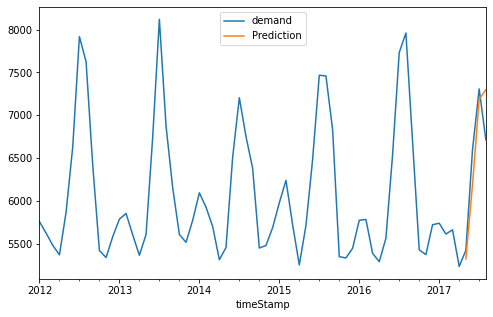

In [ ]:
##
pd.concat([ny_df_monthly['demand'], forecast_df], axis=1).plot(figsize=(8, 5));

In [ ]:
## 
forecast2 = model.predict(n_periods = 8, return_conf_int=True)
forecast2

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102,
        6401.92728851, 5789.92421436, 5693.03964211, 5951.57310624]),
 array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086],
        [5553.64733135, 7250.20724568],
        [4934.10753803, 6645.74089069],
        [4837.08540927, 6548.99387495],
        [5094.94723912, 6808.19897336]]))

In [ ]:
## test has only 4 time stamp so need to be changed
forecast_range = pd.date_range(start='2017-05-31', periods=8, freq='M')

In [ ]:
##
forecast2_df = pd.DataFrame(forecast2[0], index = forecast_range, columns=['Prediction'])
forecast2_df

,Prediction
2017-05-31,5320.832765
2017-06-30,6194.150591
2017-07-31,7184.108139
2017-08-31,7297.999631
2017-09-30,6401.927289
2017-10-31,5789.924214
2017-11-30,5693.039642
2017-12-31,5951.573106


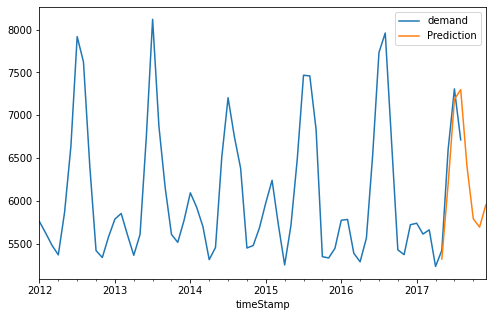

In [ ]:
##
pd.concat([ny_df_monthly['demand'], forecast2_df], axis = 1).plot(figsize=(8, 5));

In [ ]:
##
lower = pd.Series(forecast2[1][:, 0], index = forecast_range)
upper = pd.Series(forecast2[1][:, 1], index = forecast_range)

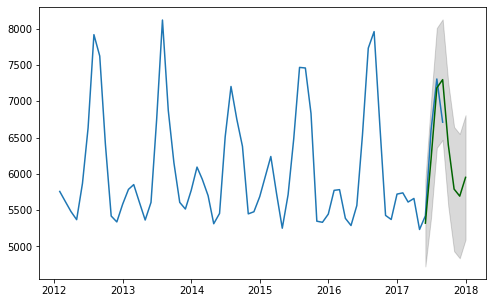

In [ ]:
# plot
plt.figure(figsize=(8,5))
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast2_df, color='darkgreen')
plt.fill_between(forecast_range,
                 lower,
                 upper,
                 color = 'k',
                 alpha = 0.15);

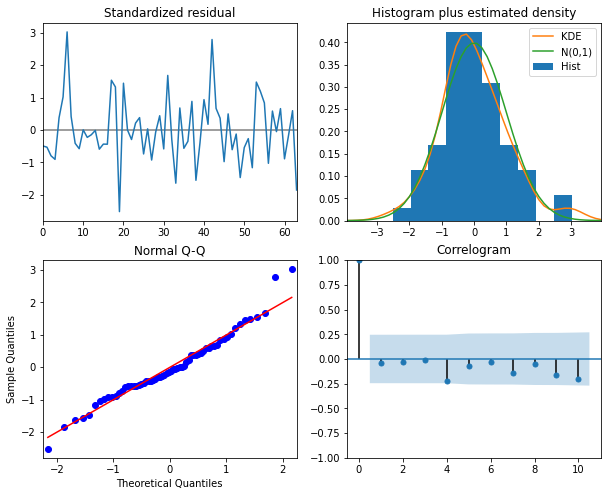

In [ ]:
out = model.plot_diagnostics(figsize=(10,8))